# 范例1. 使用自动微分估算简单线性回归的参数(w、b)
## $ y = wx + b$

In [1]:
# 载入套件
import numpy as np 
import tensorflow as tf 

## 定义训练函数

In [2]:
# 定义损失函数
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

In [3]:
# 定义预测值函数
def predict(X):
    return w * X + b    

In [4]:
# 定义训练函数
def train(X, y, epochs=40, lr=0.0001):
    current_loss=0                                # 损失函数值
    for epoch in range(epochs):                   # 执行训练周期
        with tf.GradientTape() as t:              # 自动微分
            t.watch(tf.constant(X))               # 宣告 TensorFlow 常数参与自动微分
            current_loss = loss(y, predict(X))    # 计算损失函数值
        
        dw, db = t.gradient(current_loss, [w, b]) # 取得 w, b 个别的梯度

        # 更新权重：新权重 = 原权重 — 学习率(learning_rate) * 梯度(gradient)
        w.assign_sub(lr * dw) # w -= lr * dw
        b.assign_sub(lr * db) # b -= lr * db

        # 显示每一训练周期的损失函数
        print(f'Epoch {epoch}: Loss: {current_loss.numpy()}') 

## 产生随机资料

In [5]:
# 产生线性随机资料100笔，介于 0-50
n = 100
X = np.linspace(0, 50, n) 
y = np.linspace(0, 50, n) 
  
# 资料加一点杂讯(noise)
X += np.random.uniform(-10, 10, n) 
y += np.random.uniform(-10, 10, n) 

In [6]:
X

array([ 2.39407314, -5.00590534,  1.73482828, -1.18315113, -7.69932121,
        1.7237677 , -5.33653501, 10.9963007 , -3.97331795,  5.87252545,
        2.47339408,  4.45685647,  2.74549174,  4.76755712,  1.47855095,
       11.37299164,  8.93055215,  7.99236085,  1.68157249, 16.5093615 ,
       19.68210814, 19.15746989,  7.81997355,  7.5131168 ,  8.42535659,
        8.0818436 , 18.24294332,  8.95206111,  9.24411614, 12.3943889 ,
        6.51106545, 24.15212604, 11.08595065, 20.25932115, 25.76717912,
       19.21219205, 27.33674274, 27.28924808, 20.06840124, 16.63462951,
       24.88384721, 28.62365283, 22.82200978, 14.67988211, 14.44665862,
       20.1504519 , 19.66084398, 20.55131147, 28.39554927, 17.42528644,
       31.35850323, 20.39865618, 26.58455805, 28.60545777, 26.44824826,
       37.39113411, 33.5502526 , 25.5846261 , 28.43358272, 34.95632191,
       32.68856501, 26.26140668, 37.84095579, 29.95811279, 35.74465415,
       30.65100502, 28.617077  , 43.72671041, 36.71908044, 26.08

In [7]:
y

array([ 0.29780432, -2.03788278, -5.71206289,  3.78849764,  8.8057983 ,
       11.72324187, -1.90603352, 11.02851198, -0.57861929,  3.65367212,
       11.36939081, -3.50379899,  6.65614343, -1.227231  ,  1.78838602,
       15.32575598, 11.36641493, -0.69333511, 16.8323414 ,  0.1535731 ,
        9.79060672,  9.27091946,  9.55360217, 19.83599222, 16.17751098,
       17.3308473 ,  4.83590737,  4.29802059, 21.10494367,  6.24413352,
       21.3190531 , 11.73742896, 22.54771153, 17.91014005, 15.92516429,
       14.95562589, 18.00288842, 13.70647051, 10.29981934, 12.28650382,
       15.94214252, 26.06117789, 25.66560837, 23.68127766, 14.54718981,
       17.60307806, 20.58219819, 16.01952369, 18.62209154, 32.91716089,
       26.20176254, 31.77093598, 19.35983815, 30.47245701, 28.08724614,
       20.0618215 , 21.99099638, 27.08737802, 31.10089333, 23.46632622,
       25.53785003, 32.3614844 , 34.97271029, 40.88941282, 40.24705794,
       41.1285527 , 35.88847905, 35.60114699, 44.11065761, 31.33

## 执行训练

In [8]:
# w、b 初始值均设为 0
w = tf.Variable(0.0)
b = tf.Variable(0.0)

# 执行训练
train(X, y)

# w、b 的最佳解
print(f'w={w.numpy()}, b={b.numpy()}')

Epoch 0: Loss: 896.6968994140625
Epoch 1: Loss: 629.826171875
Epoch 2: Loss: 449.1460876464844
Epoch 3: Loss: 326.8198547363281
Epoch 4: Loss: 244.0009765625
Epoch 5: Loss: 187.9298858642578
Epoch 6: Loss: 149.96783447265625
Epoch 7: Loss: 124.26622772216797
Epoch 8: Loss: 106.86534118652344
Epoch 9: Loss: 95.08428955078125
Epoch 10: Loss: 87.10802459716797
Epoch 11: Loss: 81.70777130126953
Epoch 12: Loss: 78.05152130126953
Epoch 13: Loss: 75.57601928710938
Epoch 14: Loss: 73.89994049072266
Epoch 15: Loss: 72.76507568359375
Epoch 16: Loss: 71.99665832519531
Epoch 17: Loss: 71.476318359375
Epoch 18: Loss: 71.12393188476562
Epoch 19: Loss: 70.88525390625
Epoch 20: Loss: 70.72357177734375
Epoch 21: Loss: 70.61402130126953
Epoch 22: Loss: 70.53974151611328
Epoch 23: Loss: 70.48937225341797
Epoch 24: Loss: 70.4551773071289
Epoch 25: Loss: 70.43192291259766
Epoch 26: Loss: 70.41608428955078
Epoch 27: Loss: 70.40528106689453
Epoch 28: Loss: 70.39785766601562
Epoch 29: Loss: 70.39274597167969


## 显示回归线

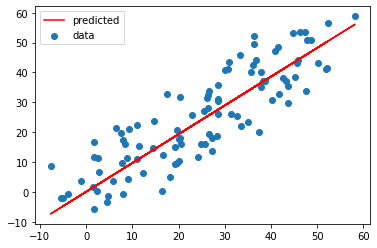

In [9]:
import matplotlib.pyplot as plt 

plt.scatter(X, y, label='data')
plt.plot(X, predict(X), 'r-', label='predicted')
plt.legend()